In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [115]:
class AI_Basic:

    def __init__(self):
        pass

    def ai_roll(self):
        return random.choice([1, 2, 3, 4, 5, 6])
    
    def ai_turn(self): # rolls once and returns score
        turn_score = 0
        roll_result = self.ai_roll()
        if roll_result == 1:
            turn_score = 0
        else:
            turn_score = roll_result
        return turn_score
        
        
class AI_Random(AI_Basic): 
    
    def ai_continue(self):
        cont = random.randint(0,1)
        if cont == 1:
            return True
        else:
            return False
    
    def ai_turn(self): # randomly chooses to hold or roll again
        turn_score = 0
        ai_will_roll = True
        count = 0
        while ai_will_roll == True:
            if count == 0:
                roll_result = self.ai_roll()
                if roll_result == 1:
                    turn_score = 0
                    ai_will_roll = False
                    count = 1
                else:
                    turn_score += roll_result
                    count = 1
            else:
                if self.ai_continue() == True:
                    roll_result = self.ai_roll()
                    if roll_result == 1:
                        turn_score = 0
                        ai_will_roll = False
                    else:
                        turn_score += roll_result
                else:
                    ai_will_roll = False
        return turn_score


class Game:

    def __init__(self, player1, player2, rounds=7):
        self.player1 = player1
        self.player2 = player2
        self.rounds = rounds

    def update_player_scores(self, round_scores): #tracks the current score of players
        self.p1_score += round_scores[0]
        self.p2_score += round_scores[1]

    def game_round(self): #plays a round and returns score for each player
        player1_round_score = self.player1.ai_turn()
        player2_round_score = self.player2.ai_turn()
        round_scores = [player1_round_score, player2_round_score]
        return round_scores

    def game_play(self):
        current_round = 1
        p1_score = 0
        p2_score = 0
        while current_round <= self.rounds:
            round_scores = self.game_round()
            p1_score += round_scores[0]
            p2_score += round_scores[1]
            current_round += 1
        final_score = [p1_score, p2_score]
        if p1_score > p2_score:
            return 1
        elif p1_score < p2_score:
            return 2
        elif p1_score == p2_score:
            return 3


In [117]:
def pig_trials(game, trials=10):
    pig_results = []
    for trial in range(trials):
        pig_results.append(game.game_play())
    return pig_results

In [120]:
ai_base = AI_Basic()
ai_random = AI_Random()
game_one = Game(ai_base, ai_random)

In [134]:
def pig_final_result(win_list):
    p1_wins = 0
    p2_wins = 0
    for win in win_list:
        if win == 1:
            p1_wins += 1
        elif win == 2:
            p2_wins += 1
    return [p1_wins, p2_wins]

In [140]:
pt_thousand = pig_trials(game_one, 1000)
thousand_trials = pig_final_result(pt_thousand)

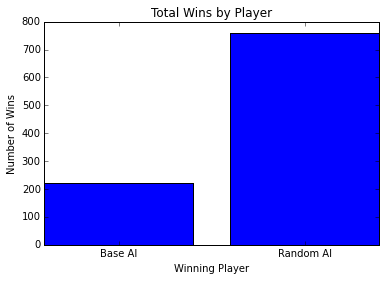

In [141]:
plt.bar(range(len(thousand_trials)), thousand_trials, align="center")
plt.xticks([0, 1], ["Base AI", "Random AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

This graph shows the total number of wins over 1000 games with the Base AI playing the Random AI. Base AI rolls once then stops. Random AI will randomly choose whether to roll again or hold. It's quite apparent that rolling only once on each turn is a terrible strategy for playing pig solitaire.

In [153]:
class AI_Rolls(AI_Basic):
    
    def __init__(self, rolls):
        self.rolls = rolls
    
    def ai_turn(self):
        turn_score = 0
        count = 0
        while count < self.rolls:
            roll_result = self.ai_roll()
            if roll_result == 1:
                turn_score = 0
                count = self.rolls + 1
            else:
                turn_score += roll_result
                count += 1
        return turn_score

In [154]:
ai_rolls = AI_Rolls(3)
game_two = Game(ai_random, ai_rolls)

In [155]:
pig_trials_thousand_two = pig_trials(game_two, 1000)

In [156]:
trial_two_results = pig_final_result(pig_trials_thousand_two)

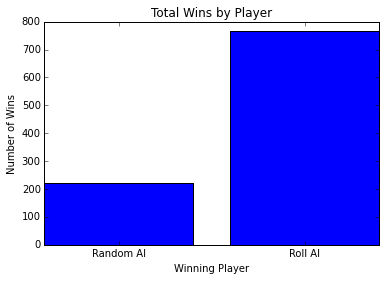

In [157]:
plt.bar(range(len(trial_two_results)), trial_two_results, align="center")
plt.xticks([0, 1], ["Random AI", "Roll AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Roll AI will roll 3 times and then hold. Against the Random AI, which randomly chooses to roll again or hold, the Roll AI wins pretty handily.

In [161]:
ai_rolls_four = AI_Rolls(4)
game_three = Game(ai_rolls, ai_rolls_four)
pig_trials_thousand_three = pig_trials(game_three, 10000)
trial_three_results = pig_final_result(pig_trials_thousand_three)

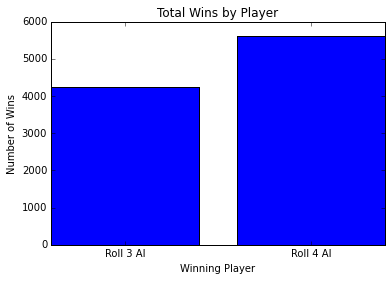

In [162]:
plt.bar(range(len(trial_three_results)), trial_three_results, align="center")
plt.xticks([0, 1], ["Roll 3 AI", "Roll 4 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Over 10,000 games, an AI that rolls 4 times before holding will win about 55% of the time compared to about 43% of the time for an AI that rolls 3 times.

In [ ]:
ai_rolls_five = AI_Rolls(5)

In [579]:
game_four = Game(ai_rolls_four, ai_rolls_five)
pig_trials_four = pig_trials(game_four, 10000)
trial_four_results = pig_final_result(pig_trials_four)

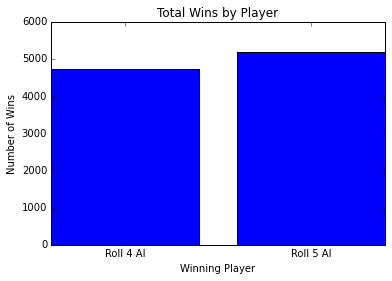

In [580]:
plt.bar(range(len(trial_four_results)), trial_four_results, align="center")
plt.xticks([0, 1], ["Roll 4 AI", "Roll 5 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Rolling 5 times beats out rolling 4 times, but only slightly, over 10,000 games. I ran this simulation a number of times as well, and though it was close at times, rolling 5 always beat out rolling 4 over the course of 10,000 games.

In [493]:
ai_rolls_six = AI_Rolls(6)
game_five = Game(ai_rolls_five, ai_rolls_six)
pig_trials_five = pig_trials(game_five, 10000)
trial_five_results = pig_final_result(pig_trials_five)

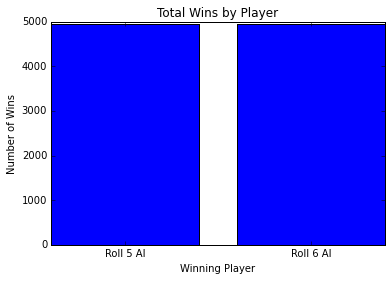

In [494]:
plt.bar(range(len(trial_five_results)), trial_five_results, align="center")
plt.xticks([0, 1], ["Roll 5 AI", "Roll 6 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Initially it seemed that a strategy of rolling 5 times before holding seems to just barely beat out a strategy of rolling 6 times. However, with more simulations, there is no clear winner. Sometimes 6 rolls beats 5, sometimes 5 beats 6, sometimes it looks even. So I'll use both of them going forward. I did run against 7 rolls and 7 doesn't win as often. This actually makes sense when we think about the probability of rolling a 1, which is 1 in 6.

In [348]:
class AI_Score(AI_Basic):
    
    def __init__(self, hold_score):
        self.hold_score = hold_score
    
    def ai_turn(self):
        turn_score = 0
        count = 0
        while turn_score <= self.hold_score and count == 0:
            roll_result = self.ai_roll()
            if roll_result == 1:
                turn_score = 0
                count = 1
            else:
                turn_score += roll_result
        return turn_score

In [441]:
ai_score_fifteen = AI_Score(15)
ai_score_twenty = AI_Score(20)
game_six = Game(ai_score_fifteen, ai_score_twenty)
pig_trials_six = pig_trials(game_six, 10000)
trial_six_results = pig_final_result(pig_trials_six)

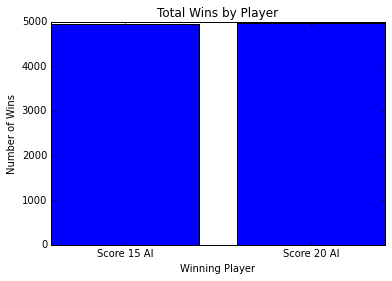

In [442]:
plt.bar(range(len(trial_six_results)), trial_six_results, align="center")
plt.xticks([0, 1], ["Score 15 AI", "Score 20 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

I ran the two cells above a bunch of times, putting in different scores for holding at, and the results were very interesting. It seems that the optimal score to hold at depends on who you're playing against. So when a score-20 player is against a score 15-player, the results are very close. If the score-20 player is against a score-18 player, the score-20 player wins more often. But score-20 loses to a score-22 player, while a score-22 player loses, though just barely, to a score-15 player. My theory to explain this is that when two players are both trying to reach a certain score, if the scores are close together, the one with the higher score-goal will usually win, because they're both taking similar risks, but the higher score is a better payoff. If the score goals are spread out, like 22 and 15, the potential payoff may be offset by the higher risk of rolling a 1 while trying for the higher score. From doing some reading, it seems that 20 is the optimal score to shoot for, based on the 1 to 5 odds of rolling a 1 or a non-1, and the sum of the remaining numbers 2, 3, 4, 5, and 6 (see: http://cs.gettysburg.edu/~tneller/papers/pig.pdf). However, as the graph below shows, when one player shoots for 20 on each round, if the other player shoots for 21 he can win more often.

In [567]:
ai_score_twenty_one = AI_Score(21)
game_seven = Game(ai_score_twenty, ai_score_twenty_one)
pig_trials_seven = pig_trials(game_seven, 10000)
trial_seven_results = pig_final_result(pig_trials_seven)

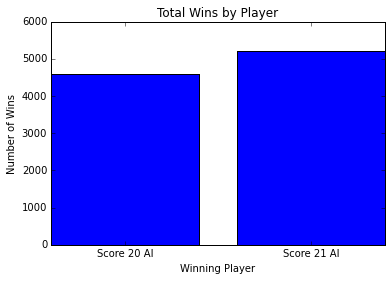

In [568]:
plt.bar(range(len(trial_seven_results)), trial_seven_results, align="center")
plt.xticks([0, 1], ["Score 20 AI", "Score 21 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Note that the player shooting for 21 beats the player trying for 20, perhaps because the payoff is higher by 1 point while the risk of rolling a 1 is very similar.

In [473]:
game_eight = Game(ai_score_twenty, ai_rolls_five)
pig_trials_eight = pig_trials(game_eight, 10000)
trial_eight_results = pig_final_result(pig_trials_eight)

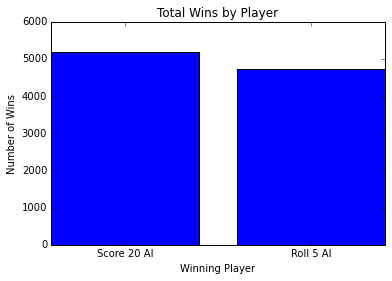

In [474]:
plt.bar(range(len(trial_eight_results)), trial_eight_results, align="center")
plt.xticks([0, 1], ["Score 20 AI", "Roll 5 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

The player who tries to get 20 and then holds appears to win more often than the player who tries to roll 5 times and then hold. This was pretty consistent in running the simulation a few times.

In [571]:
game_nine = Game(ai_score_twenty, ai_rolls_six)
pig_trials_nine = pig_trials(game_nine, 10000)
trial_nine_results = pig_final_result(pig_trials_nine)

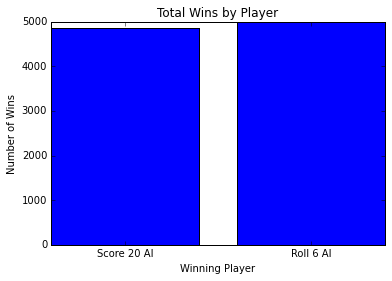

In [572]:
plt.bar(range(len(trial_nine_results)), trial_nine_results, align="center")
plt.xticks([0, 1], ["Score 20 AI", "Roll 6 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

The player who rolls 6 times before holding seems to win out over the player who tries to get 20 points per round. This one did flip back and forth some as I ran it multiple times, so there was no consistent overall winner.

In [564]:
ai_score_eighteen = AI_Score(18)

game_ten = Game(ai_score_eighteen, ai_rolls_five)
pig_trials_ten = pig_trials(game_ten, 10000)
trial_ten_results = pig_final_result(pig_trials_ten)

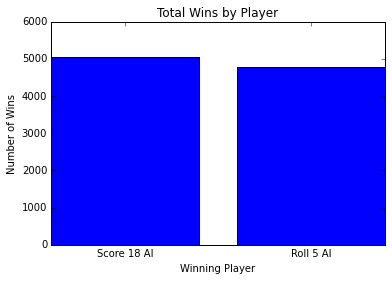

In [566]:
plt.bar(range(len(trial_ten_results)), trial_ten_results, align="center")
plt.xticks([0, 1], ["Score 18 AI", "Roll 5 AI"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Going for a score of 18 seems to be slightly better strategy than rolling 5 times and then holding, as seen in this graph.

# Conclusion

My overall conclusion from these simulations is that there is no clear cut 'best' strategy. There are, however, a couple of better strategies worth using to improve your chances of winning at pig solitaire. If deciding when to hold based on number of rolls of the dice already completed, 5 or 6 rolls is the best strategy, with 6 rolls perhaps being preferred by those who are willing to take the risk of an extra roll, and 5 rolls perhaps more comfortable for the cautious among us. If going by points accumulated on a turn, then the 18-20 range is a good target to aim at on each round. However, if you are playing against someone using this strategy also, you might want to see if you can beat them by aiming for 21 or 22 points on each round. In short, if you can gauage your opponent's strategy and risk level, then aim for slighly above that if they are rolling 5 times or holding at 18-20 points, you should win more often than lose.